In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('Datasets/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Visualize the Data

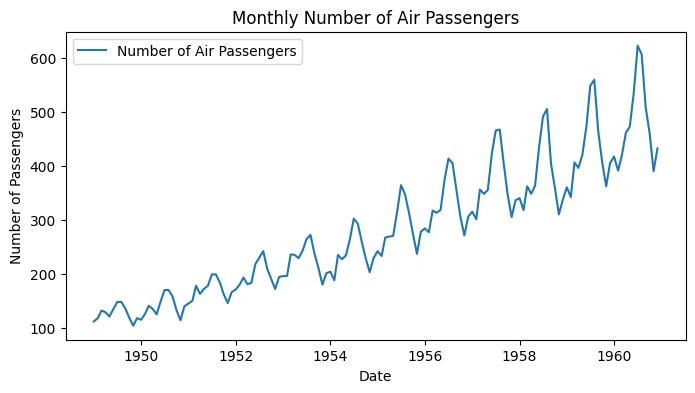

In [3]:
# Visualize the data
plt.figure(figsize=(8, 4))
plt.plot(data, label='Number of Air Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


## Decompose the Time Series

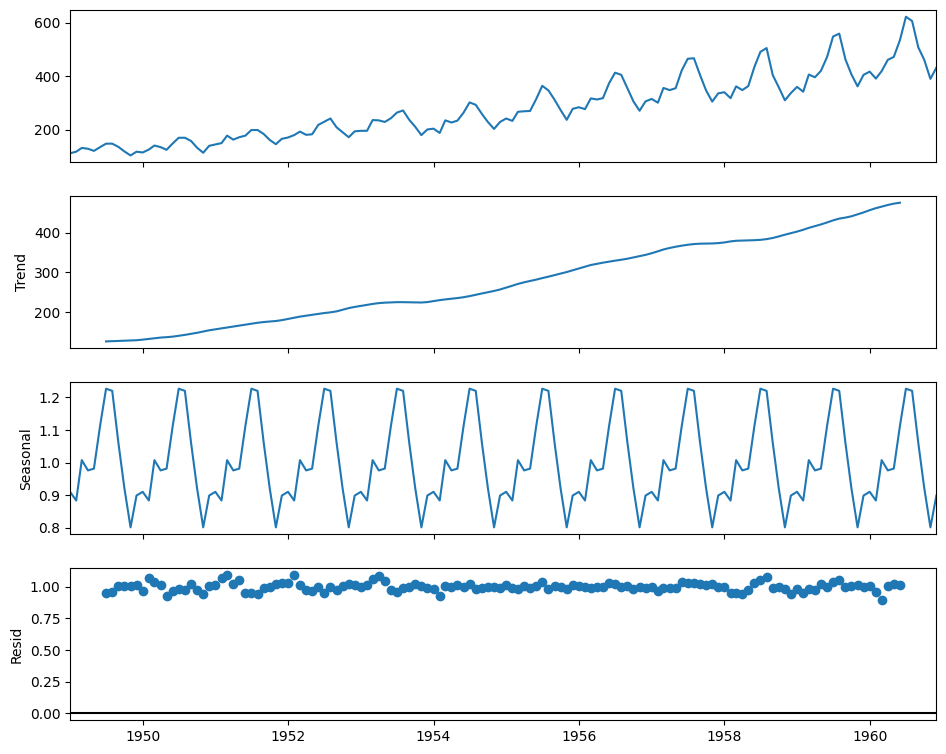

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data, model='multiplicative')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()


## Check for Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}):', value)


ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


## Detrend the Time Series

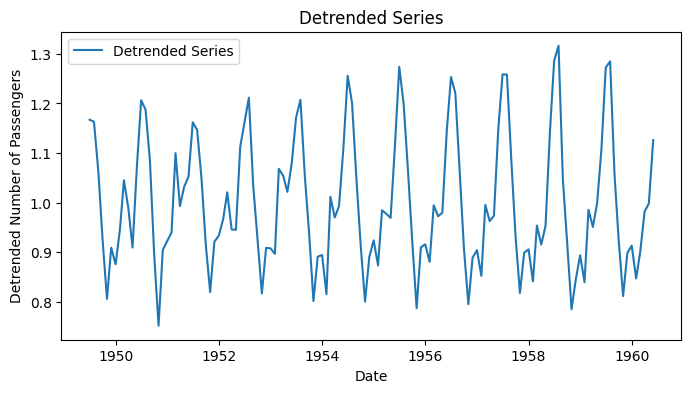

In [6]:
# Detrend the time series
detrended = data['#Passengers'] / decomposition.trend

# Plot the detrended series
plt.figure(figsize=(8, 4))
plt.plot(detrended, label='Detrended Series')
plt.title('Detrended Series')
plt.xlabel('Date')
plt.ylabel('Detrended Number of Passengers')
plt.legend()
plt.show()


## Deseasonalize the Time Series

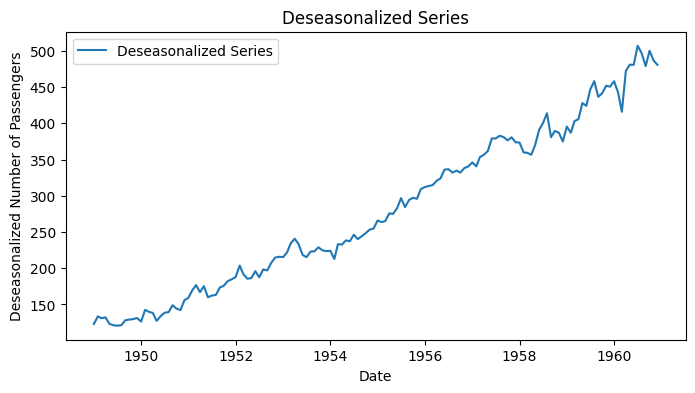

In [7]:
# Deseasonalize the time series
deseasonalized = data['#Passengers'] / decomposition.seasonal

# Plot the deseasonalized series
plt.figure(figsize=(8, 4))
plt.plot(deseasonalized, label='Deseasonalized Series')
plt.title('Deseasonalized Series')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Number of Passengers')
plt.legend()
plt.show()


## Autocorrelation and Partial Autocorrelation Functions

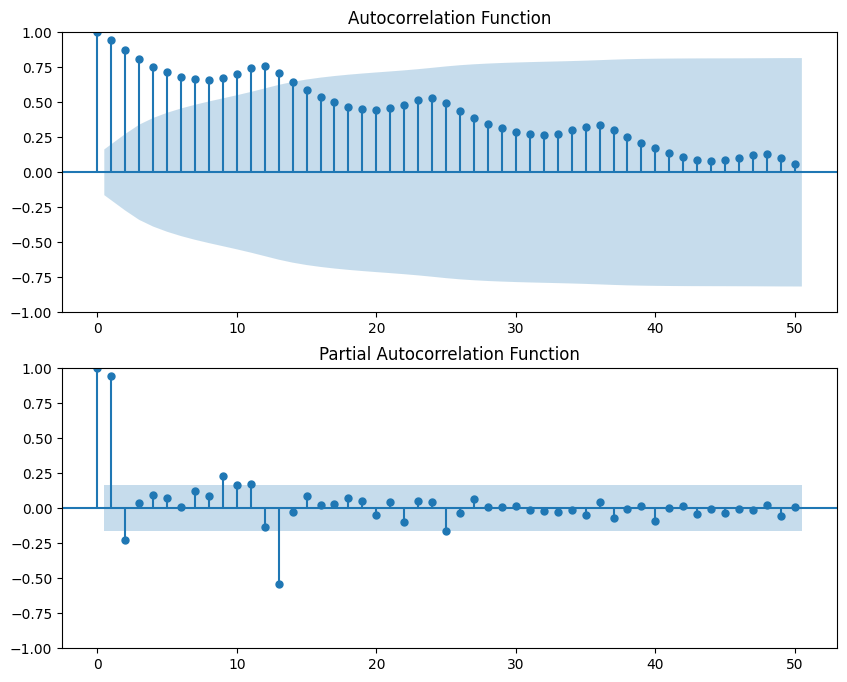

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(data, ax=ax[0], lags=50)
ax[0].set_title('Autocorrelation Function')

plot_pacf(data, ax=ax[1], lags=50)
ax[1].set_title('Partial Autocorrelation Function')

plt.show()
